# Iris Flower Classification using K-Nearest Neighbors (KNN)

This is my first machine learning project.
In this project, I classify iris flowers into three species:
- Setosa
- Versicolor
- Virginica

using the K-Nearest Neighbors (KNN) algorithm implemented from scratch.

Dataset: Iris dataset (150 samples, 4 features)


## Importing Required Libraries

- NumPy: numerical operations
- Pandas: data handling
- Matplotlib & Seaborn: visualization
- Counter: for majority voting in KNN


In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Loading the Dataset

The dataset is loaded from a CSV file using pandas.


In [193]:
df = pd.read_csv('iris.csv')

In [194]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [196]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

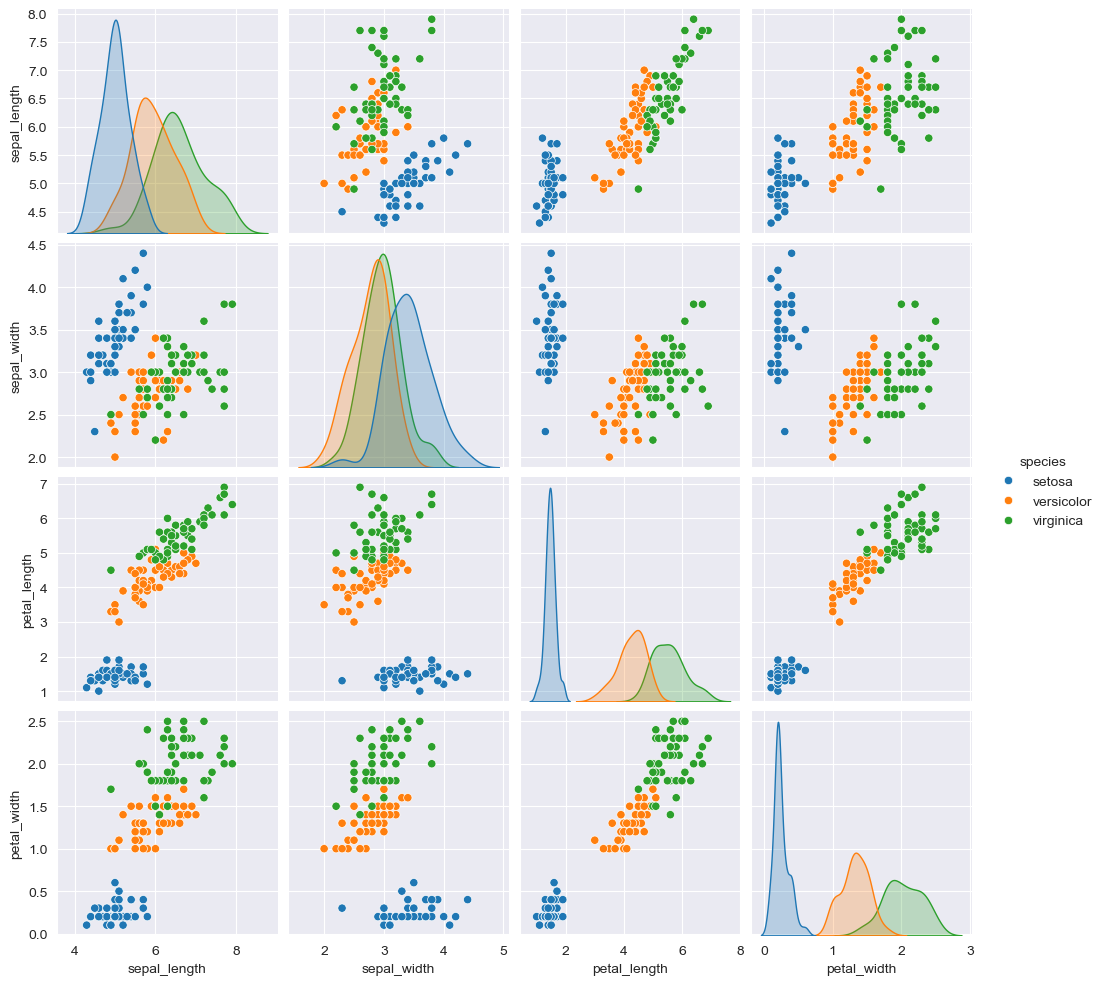

In [197]:
sns.pairplot(df , hue = 'species')
plt.show()

## Exploratory Data Analysis (EDA)

Observations:
- Dataset is balanced with equal samples per species
- Petal length and petal width clearly separate the species
- Sepal features overlap more compared to petal features


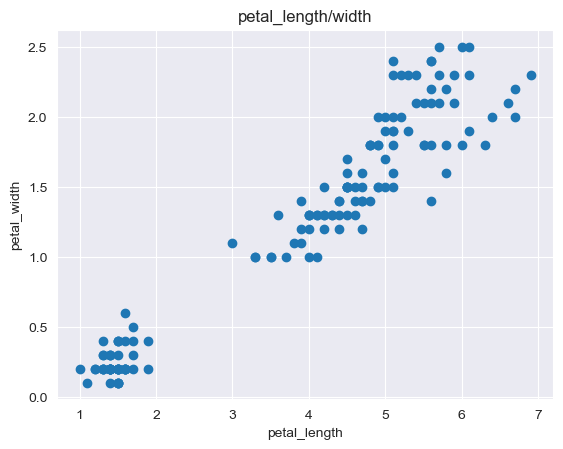

In [198]:
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('petal_length/width')

plt.scatter(df['petal_length'] , df['petal_width'])
plt.show()

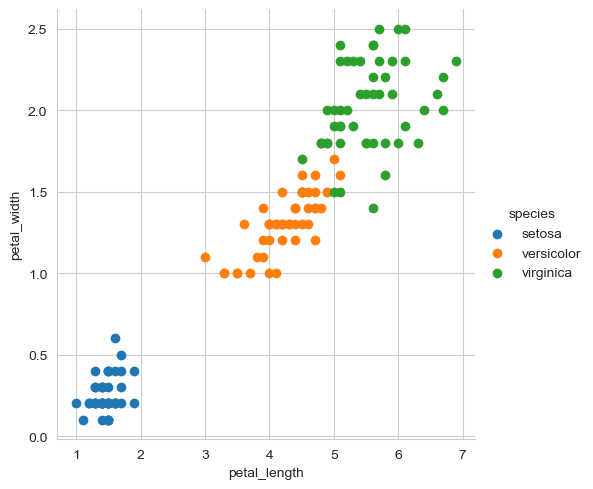

In [199]:
sns.set_style('whitegrid')
sns.FacetGrid(df , hue = 'species' , height = 5).map(plt.scatter , 'petal_length' , 'petal_width').add_legend()
plt.show()

In [200]:
# in this scatter plot setosa petal_length starts from almost 1 cm and upto 1.9 cm and petal_width start from 0.3 cm and goes upto 0.7cm
# for versicolor petal _length is from 3cm to higgest almos 5 cm and some of them are beyond it also and petal width from 1 cm to most of them are at 1.5cm
# in the case of verginica petal_length is start from 5 upto 6.9cm and petal_width is from 1.8 to 2.5 cm 

In [201]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Feature Selection

Input features:
- sepal_length
- sepal_width
- petal_length
- petal_width

Target label:
- species


In [202]:
def make_lists(data):
    input_col = []
    species = []
    for i , row in df.iterrows():
        input_col.append([row['petal_length'] , row['petal_width']])
        species.append(row['species'])

    return input_col , species

data = df.copy()
input_col , species = make_lists(data)


## K-Nearest Neighbors (KNN) Algorithm

Steps followed:
1. Calculate distance between test point and all training points
2. Select K nearest neighbors
3. Perform majority voting
4. Assign the most common class


In [203]:
def euclidean_distance(point1 , point2):
    if len(point1) != len(point2):
        return None

    return np.sqrt(np.sum((point1 - point2)**2))

def KNN(input_col , species ,point , k):
    lst = []

    for i in range(0,len(input_col)):
        distance = euclidean_distance(np.array(input_col[i]) , np.array(point) )
        lst.append((distance , species[i]))

    lst.sort(key=lambda x: x[0])
    k_nearest = [j for _ , j in lst[:k]]

    return Counter(k_nearest).most_common(1)[0][0]

k = 5
point=[2 , 3.5]
KNN(input_col , species , point , k)


'versicolor'

## Train-Test Split

- Dataset is split into training and testing sets
- 80% data for training
- 20% data for testing


In [204]:
def split_dataset(input_col , species , percentage):
    train_inp , train_out , test_inp , test_out = [] , [] , [] , []
    sample = int((percentage * len(input_col)) / 100)

    indices = np.random.choice(len(input_col), size = sample , replace = False)

    for i in range(len(input_col)):
        if i in indices:
            test_inp.append(input_col[i])
            test_out.append(species[i])
        else:
            train_inp.append(input_col[i])
            train_out.append(species[i])

    return train_inp , train_out , test_inp , test_out
            

percentage = 20
train_inp , train_out , test_inp , test_out = split_dataset(input_col , species , percentage)

In [205]:
# now we are using train-input/ output and test-input/ output and find accuracy for this splited data set 
#with fixed k value

In [206]:
def accuracy(train_inp , train_out , test_inp , test_out, k):
    count = 0

    for i in range(len(test_inp)):
        
        if test_out[i] == KNN( train_inp , train_out , test_inp[i] , k):
            count += 1

    return (count * 100 ) / len(test_inp)

k = 5
accuracy(train_inp , train_out , test_inp , test_out , k)

90.0

## Model Evaluation

Accuracy is calculated as:
(Number of correct predictions) / (Total predictions)


## Selecting the Best Value of K

The performance of KNN depends heavily on the value of **K**.
In this section, I evaluate model accuracy for different values of K
to understand which K gives better results.


### Function: `k_value()`

This function calculates the accuracy of the KNN model for
multiple values of **K**.

**Steps performed:**
1. Loop through K values from 1 to the given maximum K
2. Calculate accuracy for each K
3. Store the results in a dictionary
4. Return the dictionary of K vs Accuracy


In [207]:
def k_value(train_inp , train_out , test_inp , test_out , k):
    dict1 = {}

    for i in range(1 , k +1):
        acc1 = accuracy(train_inp , train_out , test_inp , test_out , i)

        dict1[i] = acc1

    return dict1
k = 15
k_value(train_inp , train_out , test_inp , test_out , k)

{1: 90.0,
 2: 90.0,
 3: 90.0,
 4: 90.0,
 5: 90.0,
 6: 90.0,
 7: 90.0,
 8: 90.0,
 9: 90.0,
 10: 90.0,
 11: 90.0,
 12: 90.0,
 13: 90.0,
 14: 90.0,
 15: 90.0}

The output shows how accuracy changes with different values of K.
This helps in understanding which K performs better for this dataset.


## Repeated Evaluation for Stability

To reduce randomness from a single train-test split,
the model is evaluated multiple times using different splits.

This provides a more reliable understanding of model performance.


### Function: `create_k_acc()`

This function performs multiple experiments to evaluate KNN accuracy.

**Process:**
- Dataset is split multiple times
- For each split, accuracy is calculated for K values from 1 to 15
- All K values and corresponding accuracies are stored
- This helps analyze average performance trends


In [208]:
def create_k_acc(input_col , species):
    k_values = []
    accu = []

    for i in range(0 , 30):
        train_inp , train_out , test_inp , test_out = split_dataset(input_col , species , 30)

        for j in range(1, 16):
            acc1 = accuracy(train_inp , train_out , test_inp , test_out , j)

            k_values.append(j)
            accu.append(acc1)

    return k_values , accu

k = 15
percentage = 30
k_values , acc = create_k_acc(input_col , species)

The model is evaluated 30 times using random splits,
and accuracy values are collected for different values of K.


## Storing Accuracy Results

The collected K values and accuracy scores are stored
in a Pandas DataFrame for easier analysis and visualization.


In [209]:
k = 15
percentage = 30
k_values , acc = create_k_acc(input_col , species)

dict1 = {'k-values':k_values ,
        'accuracy':acc}
dd = pd.DataFrame(dict1)

## Accuracy vs K-Value Visualization

This plot shows how accuracy changes with different K values.
It helps visually identify:
- Optimal range of K
- Stability of the model performance


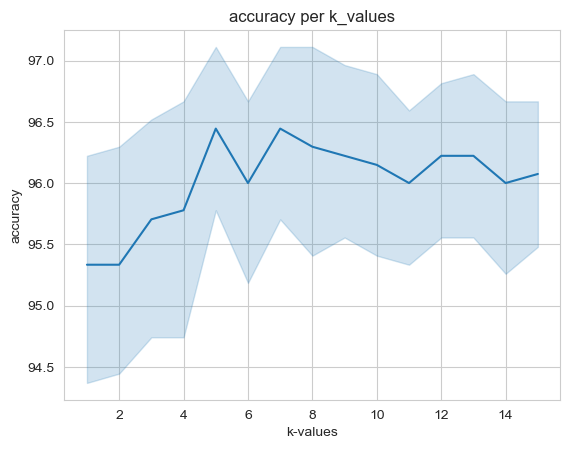

In [210]:
plt.xlabel('k-values')
plt.ylabel('accuracy')
plt.title('accuracy per k_values')

sns.set_style('darkgrid')
sns.lineplot(x = 'k-values' , y = 'accuracy' , data = dd)
plt.show()

### Observation

- Very small values of K may lead to overfitting
- Larger values of K provide smoother and more stable accuracy
- A balanced K value gives the best performance


## Conclusion

- KNN performance depends strongly on the value of K
- Evaluating multiple K values helps in selecting an optimal K
- Repeated experiments reduce randomness and improve reliability
- This project helped me understand KNN deeply by implementing it from scratch


In [211]:
def avg_acc(input_col , species):
    ll = []

    for i in range(10):
        k_vv , acc = create_k_acc(input_col , species)
        
        ll.append(np.mean(acc))

    return ll

#avg_acc(input_col , species)